To run this example locally, [install Ploomber](https://docs.ploomber.io/en/latest/get-started/install.html) and execute: `ploomber examples -n guides/refactor`

To start a free, hosted JupyterLab: [![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fguides/refactor%252FREADME.ipynb%26branch%3Dmaster)

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=guides/refactor%20issue)

Have questions? [Ask us anything on Slack.](https://ploomber.io/community/)



In [1]:
import os
from pathlib import Path
import shutil

from IPython.display import Image

# Notebook refactoring

<!-- start description -->
Using Soorgeon to convert a notebook into a Ploomber pipeline.
<!-- end description -->

[Soorgeon](https://github.com/ploomber/soorgeon) is a tool from the Ploomber ecosystem that allows you to convert monolithic notebooks into maintainable pipelines.

We have to examples, an exploratory data analysis notebook (`eda.ipynb`), and a Machine Learning notebook (`ml.ipynb`).

## Refactoring `eda.ipynb`

Before we proceed, open `eda.ipynb` to see how the code looks like, you'll notice that we have three sections (load, clean, and plot). Soorgeon uses H2 markdown headings to determine where to split the tasks in the output pipeline.

Let's execute the refactoring command:

In [2]:
%%sh
soorgeon refactor eda.ipynb

Let's generate the pipeline diagram (note: if you're running this locally, you must install `pygraphviz` first):

In [3]:
%%sh
ploomber plot

Plot saved at: pipeline.png


100%|██████████| 3/3 [00:00<00:00, 2757.60it/s]


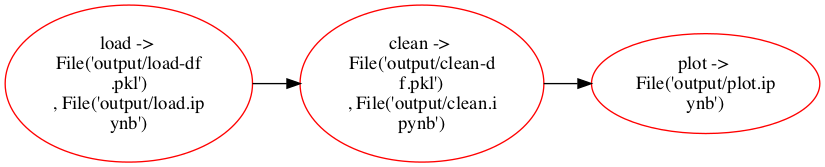

In [4]:
Image('pipeline.png')

We can see that `soorgeon refactor` generated a Ploomber pipeline with one task per notebook section. The source code for each task is in the `tasks/` folder:

In [5]:
print('\n'.join(os.listdir('tasks')))

plot.py
clean.py
random-forest-regressor.py
train-test-split.py
load.py
linear-regression.py


Each task is a `.py` file, however, as with any other Ploomber pipeline, you can open those scripts as notebooks by doing `Right click -> Open With -> Notebook`.

The command also generates a `pipeline.yaml` file, which is the file Ploomber uses to read your pipeline:

In [6]:
print(Path('pipeline.yaml').read_text())

tasks:

- source: tasks/load.py
  product:
    df: output/load-df.pkl
    nb: output/load.ipynb

- source: tasks/clean.py
  product:
    df: output/clean-df.pkl
    nb: output/clean.ipynb

- source: tasks/plot.py
  product:
    nb: output/plot.ipynb



Let's run the pipeline:

In [7]:
%%sh
ploomber build

name    Ran?      Elapsed (s)    Percentage
------  ------  -------------  ------------
load    True          3.2883        31.4768
clean   True          3.23102       30.9286
plot    True          3.92741       37.5946


Building task 'plot': 100%|██████████| 3/3 [00:10<00:00,  3.49s/it]


Let's now refactor a more complex notebook.

In [8]:
# clean up the files from this pipeline
if Path('tasks').exists():
    shutil.rmtree('tasks')

if Path('output').exists():
    shutil.rmtree('output')
    
if Path('pipeline.yaml').exists():
    Path('pipeline.yaml').unlink()

## Refactoring `ml.ipynb`

`ml.ipynb` is a Machine Learning pipeline that prepares a training set and then trains two models, let's refactor it:

In [9]:
%%sh
soorgeon refactor ml.ipynb

Let's see the diagram:

In [10]:
%%sh
ploomber plot

Plot saved at: pipeline.png


100%|██████████| 5/5 [00:00<00:00, 4227.28it/s]


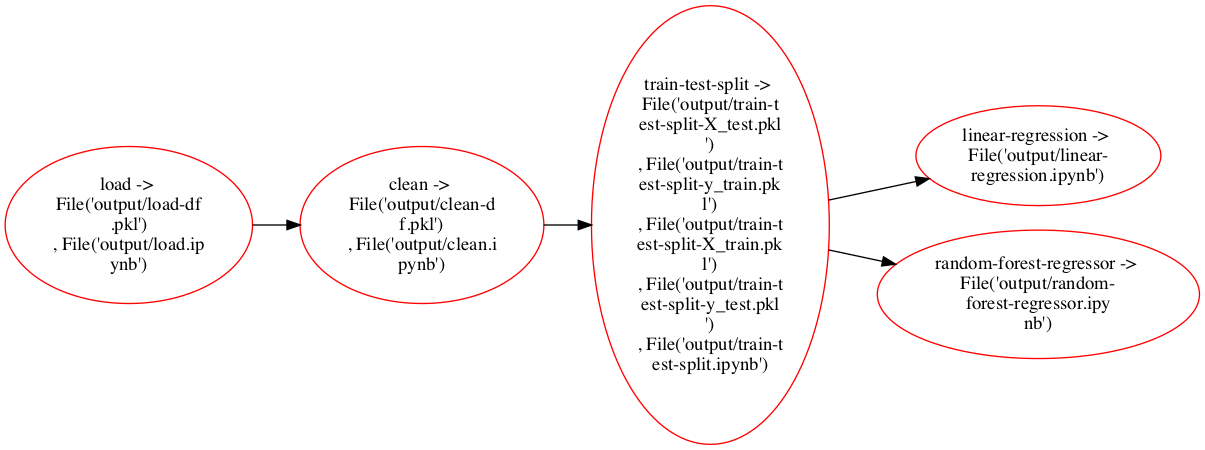

In [11]:
Image('pipeline.png')

We see that `soorgeon refactor` accurately determined the dependencies among sections, even identifying that the model training tasks (`linear-regression` and `random-forest-regressor`) are independent of each other and can run in parallel.

Let's run the pipeline:

In [12]:
%%sh
ploomber build

name                     Ran?      Elapsed (s)    Percentage
-----------------------  ------  -------------  ------------
load                     True          3.28332       12.4549
clean                    True          7.95492       30.1761
train-test-split         True          3.35634       12.7319
linear-regression        True          3.94227       14.9545
random-forest-regressor  True          7.82485       29.6826


Building task 'random-forest-regressor': 100%|██████████| 5/5 [00:26<00:00,  5.28s/it]


That's it! Now give it a try with one of your notebooks!